# K-Nearest Neighbors (K-NN)

## Importing the libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [3]:
dataset = pd.read_csv('Social_Network.csv')
x = dataset.iloc[:, [2, 3]].values
y = dataset.iloc[:, -1].values

In [4]:
dataset.head()

,ID,Umur,Pendapatan,Memiliki Rumah
0,1,27,80,1
1,2,27,77,1
2,3,32,67,1
3,4,25,40,0
4,5,35,60,1


In [5]:
print(x)

[[ 80   1]
 [ 77   1]
 [ 67   1]
 [ 40   0]
 [ 60   1]
 [ 30   0]
 [ 45   1]
 [100   1]
 [ 90   1]
 [ 95   1]
 [ 80   1]
 [ 70   0]
 [ 75   0]
 [ 60   0]
 [ 60   0]
 [ 59   0]
 [ 80   1]
 [100   1]
 [120   1]
 [ 60   0]
 [ 85   0]
 [ 70   0]
 [ 90   1]
 [ 65   0]
 [ 80   1]
 [ 77   0]
 [ 67   0]
 [ 83   1]
 [ 59   0]
 [ 80   0]
 [100   1]
 [ 60   0]
 [ 85   1]
 [ 70   0]
 [ 90   1]
 [ 65   0]
 [ 80   0]
 [110   1]
 [ 90   1]
 [110   1]
 [ 80   1]
 [ 77   0]
 [ 67   0]
 [ 83   1]
 [ 59   0]
 [ 80   0]
 [100   1]
 [ 60   0]
 [ 36   0]
 [ 70   0]
 [ 90   1]
 [ 85   1]
 [ 70   0]
 [ 90   1]
 [ 65   0]
 [ 80   1]
 [ 80   0]
 [ 77   0]
 [ 67   0]
 [ 83   1]
 [ 60   0]
 [ 59   0]
 [ 80   1]
 [100   1]
 [ 90   1]
 [ 45   0]
 [ 80   1]
 [ 70   0]
 [120   1]
 [ 45   0]
 [ 40   0]
 [ 70   0]
 [ 90   1]
 [ 45   0]
 [ 50   0]]


In [6]:
print(y)

[1 1 1 0 1 0 1 1 1 1 1 0 0 0 0 0 1 1 1 0 0 0 1 0 1 0 0 1 0 0 1 0 1 0 1 0 0
 1 1 1 1 0 0 1 0 0 1 0 0 0 1 1 0 1 0 1 0 0 0 1 0 0 1 1 1 0 1 0 1 0 0 0 1 0
 0]


## Splitting the dataset into the Training set and Test set

In [7]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

In [8]:
print(x_train)

[[ 80   0]
 [ 45   1]
 [ 90   1]
 [120   1]
 [ 60   1]
 [ 45   0]
 [ 36   0]
 [ 67   1]
 [ 80   0]
 [ 80   1]
 [ 70   0]
 [100   1]
 [ 40   0]
 [100   1]
 [ 80   1]
 [ 60   0]
 [ 90   1]
 [ 80   1]
 [ 77   1]
 [ 85   1]
 [ 90   1]
 [ 60   0]
 [ 67   0]
 [ 60   0]
 [ 80   0]
 [ 59   0]
 [ 65   0]
 [120   1]
 [ 80   1]
 [ 45   0]
 [ 59   0]
 [ 30   0]
 [ 90   1]
 [ 80   1]
 [ 85   1]
 [ 85   0]
 [ 45   0]
 [ 90   1]
 [ 60   0]
 [ 77   0]
 [110   1]
 [100   1]
 [ 80   1]
 [100   1]
 [ 65   0]
 [110   1]
 [ 67   0]
 [ 75   0]
 [ 80   0]
 [ 70   0]
 [ 95   1]
 [ 70   0]
 [ 70   0]
 [ 90   1]
 [ 60   0]
 [ 59   0]]


In [9]:
len(x_train)

56

In [10]:
len(x)

75

In [11]:
len(x_test)

19

In [12]:
len(y)

75

In [13]:
len(y_test)

19

In [14]:
len(y_train)

56

## Feature Scaling

In [15]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

## Training the K-NN model on the Training set

In [16]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(x_train, y_train)

KNeighborsClassifier()

## Predicting the Test set results

In [17]:
y_pred = classifier.predict(x_test)

## Making the Confusion Matrix

In [18]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[11  0]
 [ 0  8]]


## Visualising the Training set results

<ipython-input-19-757c4fe3f977>:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],


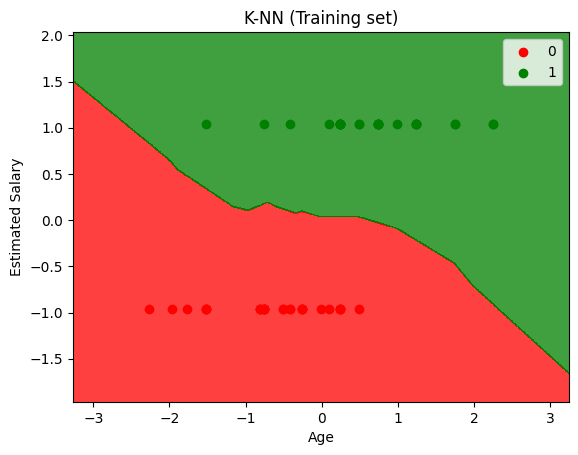

In [19]:
from matplotlib.colors import ListedColormap
x_set, y_set = x_train, y_train
x1, x2 = np.meshgrid(np.arange(start = x_set[:, 0].min() - 1, stop = x_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = x_set[:, 1].min() - 1, stop = x_set[:, 1].max() + 1, step = 0.01))
plt.contourf(x1, x2, classifier.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(x1.min(), x1.max())
plt.ylim(x2.min(), x2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('K-NN (Training set)')
plt.xlabel('Umur')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

## Visualising the Test set results

<ipython-input-20-43ff89c496b3>:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],


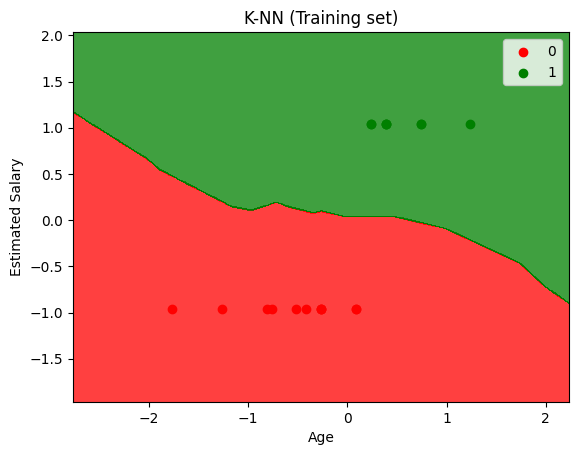

In [20]:
from matplotlib.colors import ListedColormap
x_set, y_set = x_test, y_test
x1, x2 = np.meshgrid(np.arange(start = x_set[:, 0].min() - 1, stop = x_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = x_set[:, 1].min() - 1, stop = x_set[:, 1].max() + 1, step = 0.01))
plt.contourf(x1, x2, classifier.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(x1.min(), x1.max())
plt.ylim(x2.min(), x2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('K-NN (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()